pip install pystan==2.19.1.1 prophet

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import re
import datetime

from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

from prophet import Prophet

In [2]:
df = pd.read_csv('/Users/thejakamahaulpatha/Desktop/AML 2304/Assignment 1/Assignment_1_data')

In [3]:
df.shape

(421993, 19)

In [4]:
df.isnull().mean()*100

DATE                       0.000000
TIME                       0.000000
UNIQUE_STORY_INDEX         0.000000
EVENT_TYPE                 0.000000
PNAC                       0.000000
STORY_DATE_TIME            0.000000
TAKE_DATE_TIME            40.611337
HEADLINE_ALERT_TEXT       10.225999
ACCUMULATED_STORY_TEXT    95.805855
TAKE_TEXT                 59.389848
PRODUCTS                  10.127656
TOPICS                    10.127656
RELATED_RICS              64.069072
NAMED_ITEMS               75.822348
HEADLINE_SUBTYPE          63.128298
STORY_TYPE                10.127656
TABULAR_FLAG              10.127656
ATTRIBUTION               10.127656
LANGUAGE                  10.127656
dtype: float64

In [5]:
# df3 = df[[df['HEADLINE_ALERT_TEXT'].dropna()]]
df = df[df['HEADLINE_ALERT_TEXT'].notna()]

In [6]:
df1 = df[['STORY_DATE_TIME','HEADLINE_ALERT_TEXT']]

In [7]:
df1['STORY_DATE_TIME'] = df1['STORY_DATE_TIME'].map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").date())


<ipython-input-7-f7afcb113813>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['STORY_DATE_TIME'] = df1['STORY_DATE_TIME'].map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").date())


In [8]:
df1.shape
df1 = pd.DataFrame([df1.groupby('STORY_DATE_TIME')['HEADLINE_ALERT_TEXT'].apply(list)])


In [9]:
df1 = df1.T.reset_index()
df1.head()

,STORY_DATE_TIME,HEADLINE_ALERT_TEXT
0,2013-05-31,[Mile-wide tornado touches down west of Oklaho...
1,2013-06-01,[MERCATOR MINERALS ANNOUNCES SENIOR MANAGEMENT...
2,2013-06-02,"[Test, Please Ignore -- AMERS -- 06/01 20:00, ..."
3,2013-06-03,"[글로벌 과잉유동성 문제, 경각심 가질 필요 - 김중수 한은 총재, 개별적 출구전략..."
4,2013-06-04,"[台灣已公布經濟指標--2013/6/4, 台灣已公布經濟指標--2013/6/4, 台灣經..."


In [10]:
# df1['HEADLINE_ALERT_TEXT']

# for ls in df1['HEADLINE_ALERT_TEXT']:
#     print(len(ls))

# def removeNan(x):
#     for 
# df1['HEADLINE_ALERT_TEXT'] = df1['HEADLINE_ALERT_TEXT'].map(lambda x: x.remove('nan'))

### 2.2 Removing non Alphanumeric from text data

In [11]:
df1['HEADLINE_ALERT_TEXT'] = df1['HEADLINE_ALERT_TEXT'].map(lambda x: re.sub('[^a-zA-Z ]+','',str(x)))

### 2.3 Convert to Lower

In [12]:
df1['HEADLINE_ALERT_TEXT'] = df1['HEADLINE_ALERT_TEXT'].map(lambda x: str(x).lower())

### 2.4 Tokenizing

In [13]:
from nltk.tokenize import word_tokenize

In [14]:
df1['Tokenized'] = df1['HEADLINE_ALERT_TEXT'].map(lambda x: word_tokenize(str(x)))

### 2.5 Stop word Removal

In [15]:
from nltk.corpus import stopwords as sw

In [16]:
stopwordsEnglish = sw.words('English')

In [17]:
def removeStops(x):
    arrTemp = []
    for i in x:
        if i not in stopwordsEnglish:
            arrTemp.append(i)

    return arrTemp

# df1['Stop Word Removed'] = df1['Tokenized'].map(lambda x: removeStops(str(x)) )
df1['Stop Word Removed'] = df1['Tokenized'].map(lambda x: removeStops(x) )

### 2.6 Lemmatization

In [18]:
lem = WordNetLemmatizer()

def lemmatizeWords(x):
    arrTemp = []
    for i in x:
        arrTemp.append(lem.lemmatize(i,pos='n'))

    return arrTemp

# df1['Stop Word Removed'] = df1['Tokenized'].map(lambda x: removeStops(str(x)) )
df1['Lemmatized'] = df1['Stop Word Removed'].map(lambda x: lemmatizeWords(x) )

### 2.7 Fequent Words

In [19]:
fdist = FreqDist()

In [20]:
def getFreqWrod(x):
    fdist = FreqDist()
    for word in x:
        fdist[word] +=1
#     return dict(fdist.most_common(3)
    return dict(fdist.most_common(10))

df1['FDist'] = df1['Lemmatized'].map(lambda x: getFreqWrod(x))

In [21]:
df1.head(100)

,STORY_DATE_TIME,HEADLINE_ALERT_TEXT,Tokenized,Stop Word Removed,Lemmatized,FDist
0,2013-05-31,milewide tornado touches down west of oklahoma...,"[milewide, tornado, touches, down, west, of, o...","[milewide, tornado, touches, west, oklahoma, c...","[milewide, tornado, touch, west, oklahoma, cit...","{'milewide': 2, 'tornado': 2, 'touch': 2, 'wes..."
1,2013-06-01,mercator minerals announces senior management ...,"[mercator, minerals, announces, senior, manage...","[mercator, minerals, announces, senior, manage...","[mercator, mineral, announces, senior, managem...","{'test': 308, 'please': 300, 'ignore': 300, 'u..."
2,2013-06-02,test please ignore amers test please ignor...,"[test, please, ignore, amers, test, please, ig...","[test, please, ignore, amers, test, please, ig...","[test, please, ignore, amers, test, please, ig...","{'test': 308, 'please': 298, 'ignore': 298, 'd..."
3,2013-06-03,...,"[hsbc, pmi, hsbc, pmi, diary, vietnam, diary, ...","[hsbc, pmi, hsbc, pmi, diary, vietnam, diary, ...","[hsbc, pmi, hsbc, pmi, diary, vietnam, diary, ...","{'news': 1725, 'top': 1597, 'de': 1412, 'u': 9..."
4,2013-06-04,diary vietnam diary vietnam test ple...,"[diary, vietnam, diary, vietnam, test, please,...","[diary, vietnam, diary, vietnam, test, please,...","[diary, vietnam, diary, vietnam, test, please,...","{'news': 1649, 'top': 1567, 'de': 1352, 'share..."
5,2013-06-05,diary vietnam diary vietnam dallas...,"[diary, vietnam, diary, vietnam, dallas, feds,...","[diary, vietnam, diary, vietnam, dallas, feds,...","[diary, vietnam, diary, vietnam, dallas, fed, ...","{'de': 1572, 'news': 1562, 'top': 1487, 'u': 9..."
6,2013-06-06,diary vietnam diary vietnam tes...,"[diary, vietnam, diary, vietnam, test, please,...","[diary, vietnam, diary, vietnam, test, please,...","[diary, vietnam, diary, vietnam, test, please,...","{'news': 1699, 'de': 1631, 'top': 1605, 'u': 8..."
7,2013-06-07,diary vietnam diary vietnam test p...,"[diary, vietnam, diary, vietnam, test, please,...","[diary, vietnam, diary, vietnam, test, please,...","[diary, vietnam, diary, vietnam, test, please,...","{'news': 1550, 'top': 1518, 'de': 1438, 'u': 9..."
8,2013-06-08,test please ignore emea test please ignore...,"[test, please, ignore, emea, test, please, ign...","[test, please, ignore, emea, test, please, ign...","[test, please, ignore, emea, test, please, ign...","{'test': 335, 'ignore': 310, 'please': 306, 'd..."
9,2013-06-09,test please ignore amers test please ignor...,"[test, please, ignore, amers, test, please, ig...","[test, please, ignore, amers, test, please, ig...","[test, please, ignore, amers, test, please, ig...","{'test': 336, 'please': 304, 'ignore': 304, 'd..."


In [22]:
def valueList(x):
    return [list(x.values())]

df1['values'] = df1['FDist'].map(lambda x: valueList(x) )

In [23]:
df1.head()

,STORY_DATE_TIME,HEADLINE_ALERT_TEXT,Tokenized,Stop Word Removed,Lemmatized,FDist,values
0,2013-05-31,milewide tornado touches down west of oklahoma...,"[milewide, tornado, touches, down, west, of, o...","[milewide, tornado, touches, west, oklahoma, c...","[milewide, tornado, touch, west, oklahoma, cit...","{'milewide': 2, 'tornado': 2, 'touch': 2, 'wes...","[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]]"
1,2013-06-01,mercator minerals announces senior management ...,"[mercator, minerals, announces, senior, manage...","[mercator, minerals, announces, senior, manage...","[mercator, mineral, announces, senior, managem...","{'test': 308, 'please': 300, 'ignore': 300, 'u...","[[308, 300, 300, 272, 255, 156, 137, 124, 119,..."
2,2013-06-02,test please ignore amers test please ignor...,"[test, please, ignore, amers, test, please, ig...","[test, please, ignore, amers, test, please, ig...","[test, please, ignore, amers, test, please, ig...","{'test': 308, 'please': 298, 'ignore': 298, 'd...","[[308, 298, 298, 225, 187, 139, 116, 114, 110,..."
3,2013-06-03,...,"[hsbc, pmi, hsbc, pmi, diary, vietnam, diary, ...","[hsbc, pmi, hsbc, pmi, diary, vietnam, diary, ...","[hsbc, pmi, hsbc, pmi, diary, vietnam, diary, ...","{'news': 1725, 'top': 1597, 'de': 1412, 'u': 9...","[[1725, 1597, 1412, 957, 731, 723, 694, 666, 6..."
4,2013-06-04,diary vietnam diary vietnam test ple...,"[diary, vietnam, diary, vietnam, test, please,...","[diary, vietnam, diary, vietnam, test, please,...","[diary, vietnam, diary, vietnam, test, please,...","{'news': 1649, 'top': 1567, 'de': 1352, 'share...","[[1649, 1567, 1352, 871, 788, 685, 659, 646, 5..."


In [24]:
def keyList(x):
    return [list(x.keys())]

df1['Labels'] = df1['FDist'].map(lambda x: keyList(x) )

In [25]:
df1.head()

,STORY_DATE_TIME,HEADLINE_ALERT_TEXT,Tokenized,Stop Word Removed,Lemmatized,FDist,values,Labels
0,2013-05-31,milewide tornado touches down west of oklahoma...,"[milewide, tornado, touches, down, west, of, o...","[milewide, tornado, touches, west, oklahoma, c...","[milewide, tornado, touch, west, oklahoma, cit...","{'milewide': 2, 'tornado': 2, 'touch': 2, 'wes...","[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]]","[[milewide, tornado, touch, west, oklahoma, ci..."
1,2013-06-01,mercator minerals announces senior management ...,"[mercator, minerals, announces, senior, manage...","[mercator, minerals, announces, senior, manage...","[mercator, mineral, announces, senior, managem...","{'test': 308, 'please': 300, 'ignore': 300, 'u...","[[308, 300, 300, 272, 255, 156, 137, 124, 119,...","[[test, please, ignore, update, de, alert, en,..."
2,2013-06-02,test please ignore amers test please ignor...,"[test, please, ignore, amers, test, please, ig...","[test, please, ignore, amers, test, please, ig...","[test, please, ignore, amers, test, please, ig...","{'test': 308, 'please': 298, 'ignore': 298, 'd...","[[308, 298, 298, 225, 187, 139, 116, 114, 110,...","[[test, please, ignore, de, update, alert, top..."
3,2013-06-03,...,"[hsbc, pmi, hsbc, pmi, diary, vietnam, diary, ...","[hsbc, pmi, hsbc, pmi, diary, vietnam, diary, ...","[hsbc, pmi, hsbc, pmi, diary, vietnam, diary, ...","{'news': 1725, 'top': 1597, 'de': 1412, 'u': 9...","[[1725, 1597, 1412, 957, 731, 723, 694, 666, 6...","[[news, top, de, u, share, pct, say, update, m..."
4,2013-06-04,diary vietnam diary vietnam test ple...,"[diary, vietnam, diary, vietnam, test, please,...","[diary, vietnam, diary, vietnam, test, please,...","[diary, vietnam, diary, vietnam, test, please,...","{'news': 1649, 'top': 1567, 'de': 1352, 'share...","[[1649, 1567, 1352, 871, 788, 685, 659, 646, 5...","[[news, top, de, share, u, update, say, reuter..."


In [26]:
df1.shape

(31, 8)

In [27]:
df4 = df1[['STORY_DATE_TIME','FDist']]


In [28]:
df4.head()

,STORY_DATE_TIME,FDist
0,2013-05-31,"{'milewide': 2, 'tornado': 2, 'touch': 2, 'wes..."
1,2013-06-01,"{'test': 308, 'please': 300, 'ignore': 300, 'u..."
2,2013-06-02,"{'test': 308, 'please': 298, 'ignore': 298, 'd..."
3,2013-06-03,"{'news': 1725, 'top': 1597, 'de': 1412, 'u': 9..."
4,2013-06-04,"{'news': 1649, 'top': 1567, 'de': 1352, 'share..."


In [29]:
df5 = pd.concat([df4.drop(['FDist'], axis=1), df4['FDist'].apply(pd.Series)], axis=1)

In [30]:
df5.head()

,STORY_DATE_TIME,milewide,tornado,touch,west,oklahoma,city,report,briefaffymax,end,...,fed,order,imbalance,side,nyse,sell,buy,snowden,service,see
0,2013-05-31,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df5 = df5.fillna(0)

In [32]:
df5.head(100)

,STORY_DATE_TIME,milewide,tornado,touch,west,oklahoma,city,report,briefaffymax,end,...,fed,order,imbalance,side,nyse,sell,buy,snowden,service,see
0,2013-05-31,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013-06-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2013-06-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2013-06-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013-06-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2013-06-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2013-06-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2013-06-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2013-06-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2013-06-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='STORY_DATE_TIME'>

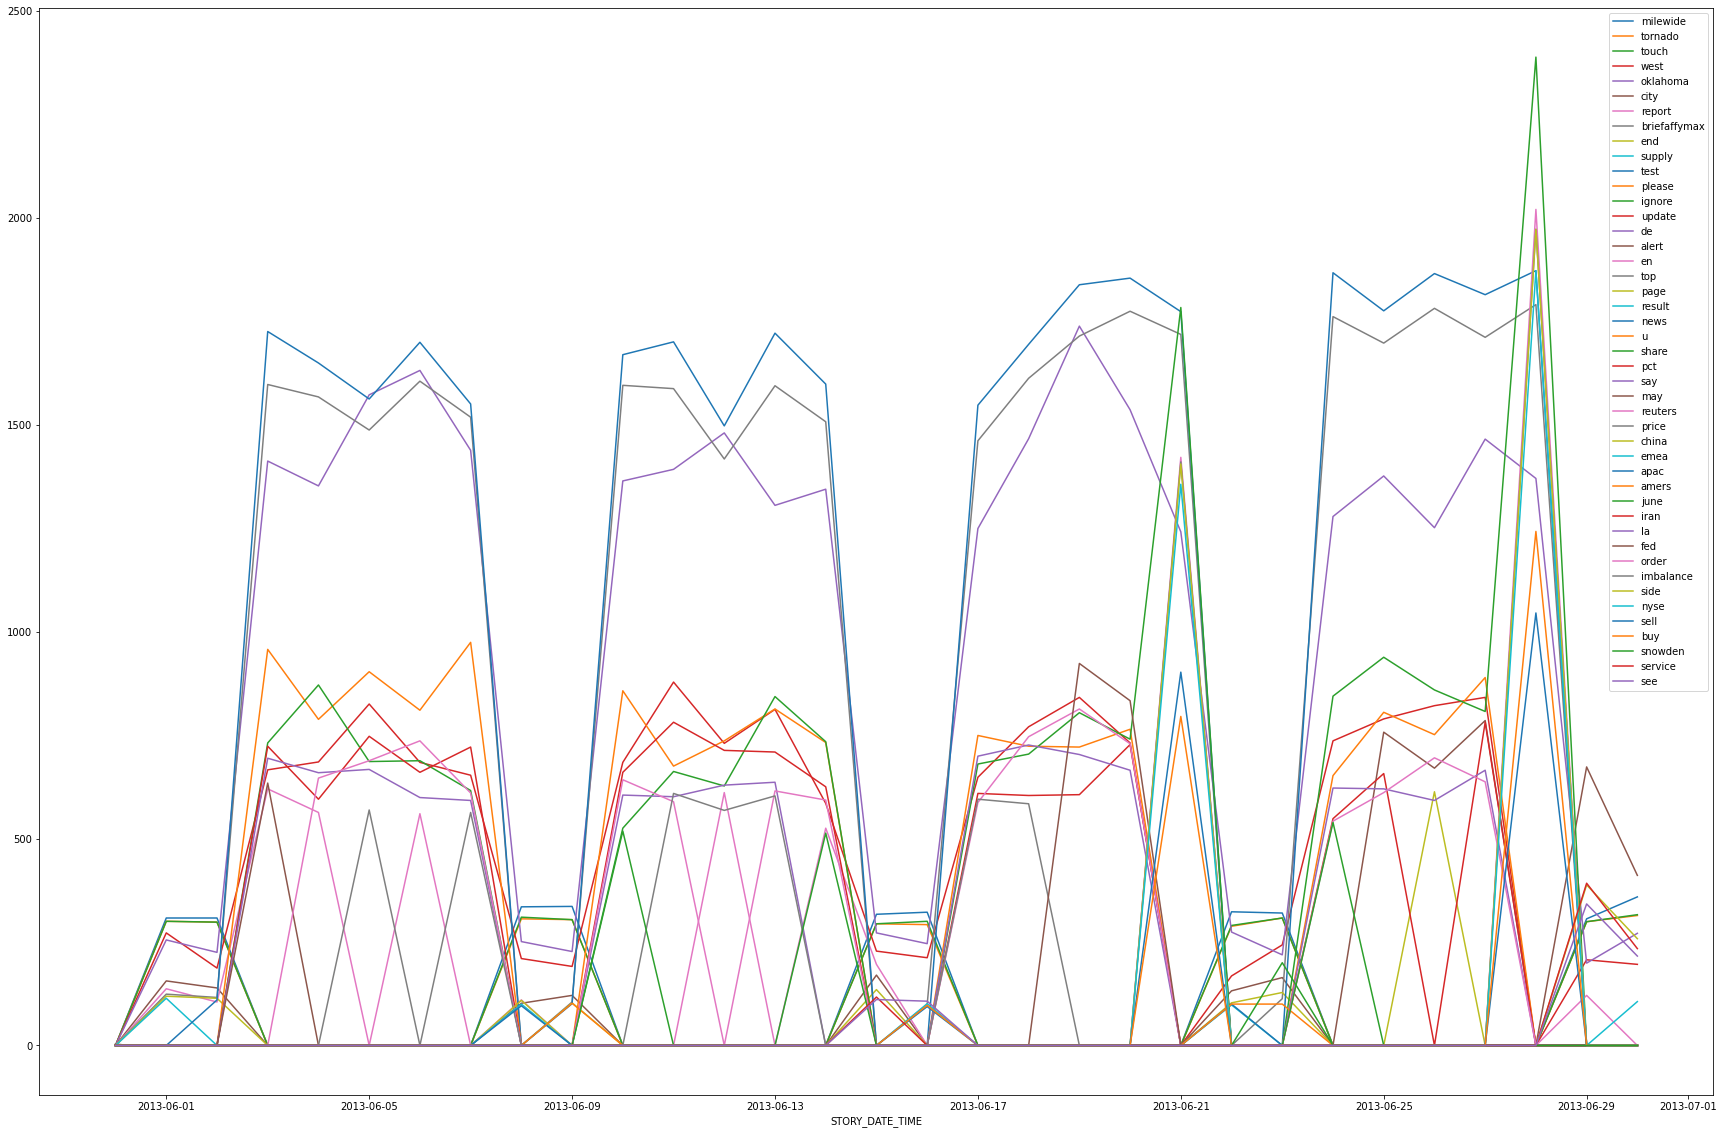

In [33]:
plt.rcParams["figure.figsize"] = (30,20)
df5.set_index('STORY_DATE_TIME').plot()

In [34]:
# train = df5[df5.loc[] < ]
# test = df5[df5.index > pd.to_datetime("2020-11-01", format='%Y-%m-%d')]

startdate = df5.iloc[24,0]
train = df5[(df5['STORY_DATE_TIME'] < startdate)]
test =  df5[(df5['STORY_DATE_TIME'] >= startdate)]

In [37]:
model = Prophet()

In [54]:
# df6 = df5[['STORY_DATE_TIME','milewide']]
df6 = pd.DataFrame(columns = ['ds', 'y'])

# df6.columns = ['ds', 'y']
df6['ds']= df5['STORY_DATE_TIME'].values
df6['y'] = df5['milewide'].values

# df6.shape
model.fit(df6)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.


In [ ]:
# from multi_prophet import MultiProphet

In [ ]:
# m = MultiProphet(columns=[df5.columns])

In [ ]:
for i in range(1, 13):
    date = '2013-07-%02d' % i
    future.append([date])
    
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

In [63]:
cols = df5.shape[1]
cols

col_lst = list(df5.columns)

In [78]:
future = list()
for i in range(1, 13):
    date = '2013-07-%02d' % i
    future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])

In [79]:
future.head()

,ds
0,2013-07-01
1,2013-07-02
2,2013-07-03
3,2013-07-04
4,2013-07-05


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.


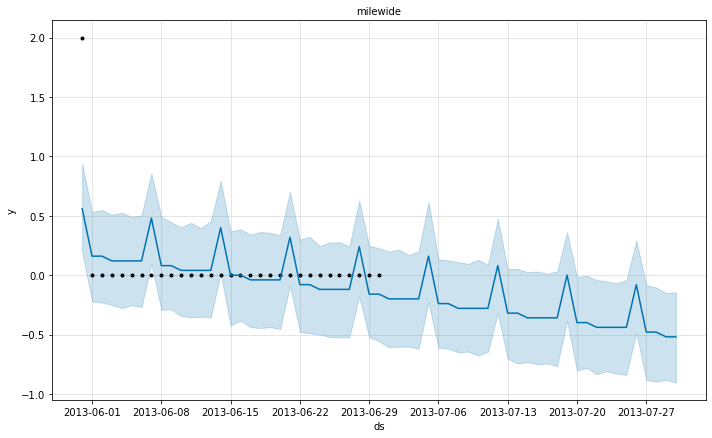

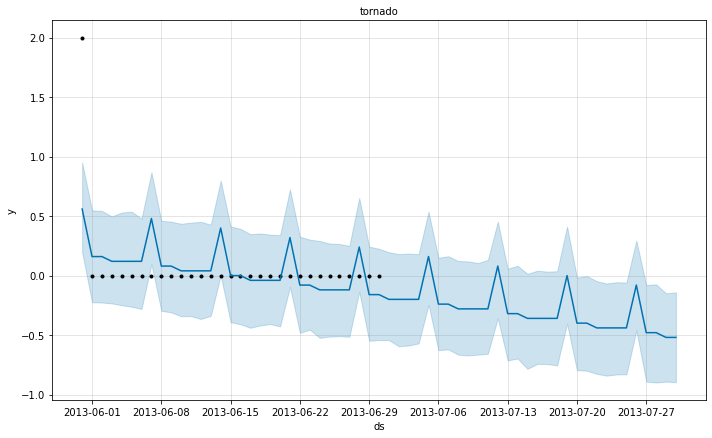

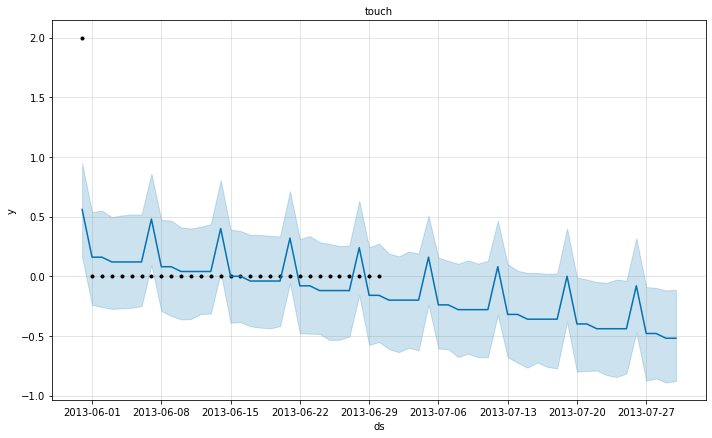

In [93]:
def train_and_forecast(col_index):
    df7 = df5.rename(columns={"STORY_DATE_TIME": 'ds', col_lst[col_index]: 'y'})
    m = Prophet()
    pred_model =m.fit(df7)
    future = m.make_future_dataframe(periods=30)
    forecast = m.predict(future)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
    fig = m.plot(forecast)
    ax = fig.gca()
    ax.set_title(col_lst[col_index], size=10)

for i in range(1,4):
    train_and_forecast(i)